In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql
import plotly_express as px

In [27]:
parks = pd.read_csv('archive-2/parks.csv')
species = pd.read_csv('archive-2/species.csv')

/var/folders/ly/1tqv92455b5db15clb7wtwwh0000gn/T/ipykernel_3055/549659019.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv('archive-2/species.csv')


In [28]:
species.head()

,species_id,park_name,category,order,family,scientific_name,common_names,record_status,occurrence,nativeness,abundance,seasonality,conservation_status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [29]:
species.shape

(119248, 14)

In [30]:
species.dtypes

species_id             object
park_name              object
category               object
order                  object
family                 object
scientific_name        object
common_names           object
record_status          object
occurrence             object
nativeness             object
abundance              object
seasonality            object
conservation_status    object
Unnamed: 13            object
dtype: object

In [7]:
species.isna().sum()*100/len(species)

species_id              0.000000
park_name               0.000000
category                0.000000
order                   1.234402
family                  1.267946
scientific_name         0.000000
common_names           22.765162
record_status           0.005032
occurrence             16.890849
nativeness             21.002449
abundance              36.010667
seasonality            83.096572
conservation_status    96.043540
Unnamed: 13            99.995807
dtype: float64

In [8]:
species = species.drop(columns=['record_status', 'occurrence', 
                                'nativeness','abundance', 'seasonality',
                                 'conservation_status','Unnamed: 13'])

In [31]:
species

,species_id,park_name,category,order,family,scientific_name,common_names,record_status,occurrence,nativeness,abundance,seasonality,conservation_status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,NaN


In [32]:
# import pandas_gbq

In [33]:
# import pandas


# # TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "da-bootcamp-2023"

# # TODO: Set table_id to the full destination table ID (including the
# #       dataset ID).
# table_id = 'species_NPS.species'

# pandas_gbq.to_gbq(species, table_id, project_id=project_id)

In [34]:
species.shape

(119248, 14)

In [35]:
species.duplicated().sum()*100/len(species)

0.0

In [36]:
parks.duplicated().sum()*100/len(parks)

0.0

In [37]:
parks.shape

(56, 6)

In [38]:
parks['Park Code'].to_csv('park_codes.csv')

In [39]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Park Code  56 non-null     object 
 1   Park Name  56 non-null     object 
 2   State      56 non-null     object 
 3   Acres      56 non-null     int64  
 4   Latitude   56 non-null     float64
 5   Longitude  56 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [40]:
species.shape

(119248, 14)

In [41]:
species.columns

Index(['species_id', 'park_name', 'category', 'order', 'family',
       'scientific_name', 'common_names', 'record_status', 'occurrence',
       'nativeness', 'abundance', 'seasonality', 'conservation_status',
       'Unnamed: 13'],
      dtype='object')

In [68]:
species['category'].value_counts()

category
Vascular Plant         65221
Bird                   14601
Insect                 14349
Fungi                   6203
Nonvascular Plant       4278
Fish                    3956
Mammal                  3867
Invertebrate            1566
Reptile                 1343
Algae                    976
Slug/Snail               787
Spider/Scorpion          776
Amphibian                743
Crab/Lobster/Shrimp      582
Name: count, dtype: int64

In [82]:
species['scientific_name'].nunique()

46022

In [78]:
b = a*100/len(species)

In [79]:
df_b = pd.DataFrame(b)

Text(43, 13, 'Distinct species = 46,022')

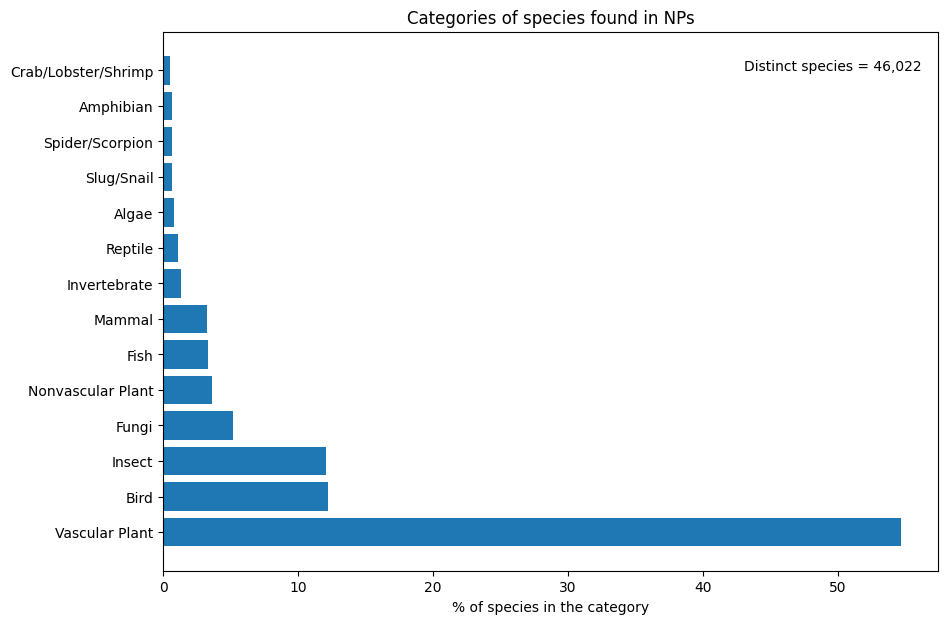

In [89]:
plt.figure(figsize=(10,7))
plt.barh(df_b.index,df_b['count'])
plt.title('Categories of species found in NPs')
plt.xlabel('% of species in the category')
plt.text(43,13,'Distinct species = 46,022')

In [42]:
sp_types = species['category'].value_counts()
df_sp_types = pd.DataFrame(sp_types)

Text(0.5, 0, 'Count of species in the category')

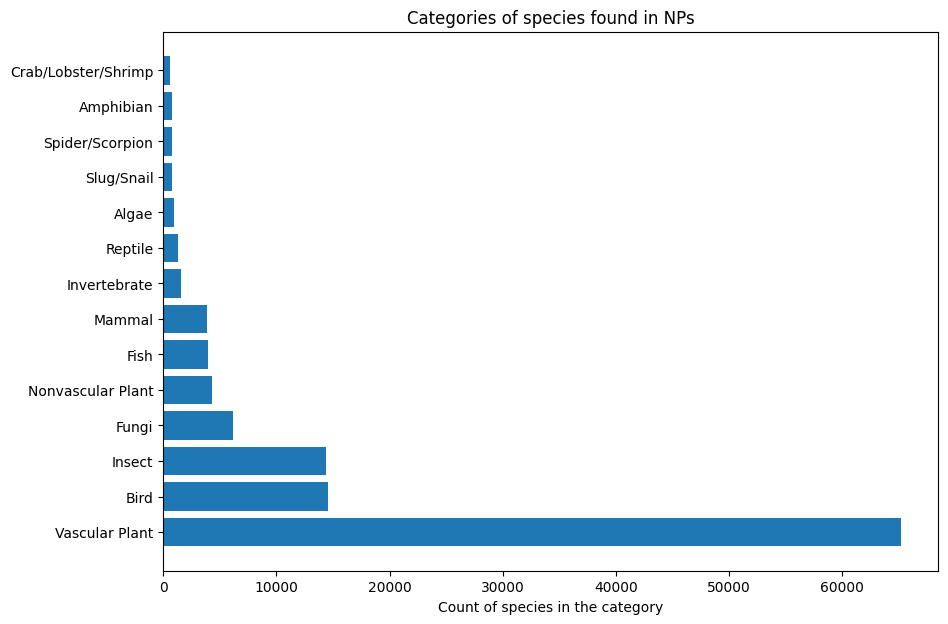

In [43]:
plt.figure(figsize=(10,7))
plt.barh(df_sp_types.index,df_sp_types['count'])
plt.title('Categories of species found in NPs')
plt.xlabel('Count of species in the category')

In [44]:
parks = parks.rename(columns={'Park Code': 'park_code', 'Park Name': 'park_name', 'State': 'state', 'Acres': 'acres', 'Latitude':'latitude', 'Longitude': 'longitude'})

In [45]:
parks['area_km2'] = round(parks['acres']/247.105,0)

In [46]:
parks

,park_code,park_name,state,acres,latitude,longitude,area_km2
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,192.0
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,310.0
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,982.0
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,3242.0
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,700.0
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72,133.0
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18,145.0
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93,1366.0
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17,979.0
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44,189.0


In [47]:
#we drop this column because it's empty
species = species.drop(columns='Unnamed: 13')

In [48]:
species.columns

Index(['species_id', 'park_name', 'category', 'order', 'family',
       'scientific_name', 'common_names', 'record_status', 'occurrence',
       'nativeness', 'abundance', 'seasonality', 'conservation_status'],
      dtype='object')

In [49]:
def remove_null_fields(obj):
    return {k:v for k, v in obj.items() if v is not None}

In [50]:
#defining an activities function to extract the activities from the SQL database
def activities():
    db_conn = pymysql.connect(host="localhost", user="root", database="biodiversity",
                              password= 'Eatyourdinner0991',
                              cursorclass=pymysql.cursors.DictCursor)

    with db_conn.cursor() as cursor:
        cursor.execute("""SELECT activity,count(*) from activities_parks
                        group by activity;
        """,)
        act = cursor.fetchall()
        if not act:
            abort(404)

    db_conn.close()
    return act

In [51]:
#extracting the activity list using the activities function
activity_list = activities()

In [52]:
# activity_list is a list of dictionaries
data = [{'activity': d['activity'], 'count': d['count(*)']} for d in activity_list]

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

In [53]:
#ordering the dataframe in a descending order based on the count column
df = df.sort_values(['count'],ascending=False)

In [54]:
#renaming columns to make the figure neater
# Boolean indexing to select rows where activity is 'Junior Rangers Program'
junior_rangers_index = df['activity'] == 'Junior Ranger Program'

# Update the 'activity' column for selected rows
df.loc[junior_rangers_index, 'activity'] = 'Jr Rangers'

# Boolean indexing to select rows where activity is 'Junior Rangers Program'
tours_index = df['activity'] == 'Guided Tours'

# Update the 'activity' column for selected rows
df.loc[tours_index, 'activity'] = 'Tours'

Text(0, 0.5, 'Number of parks/activity')

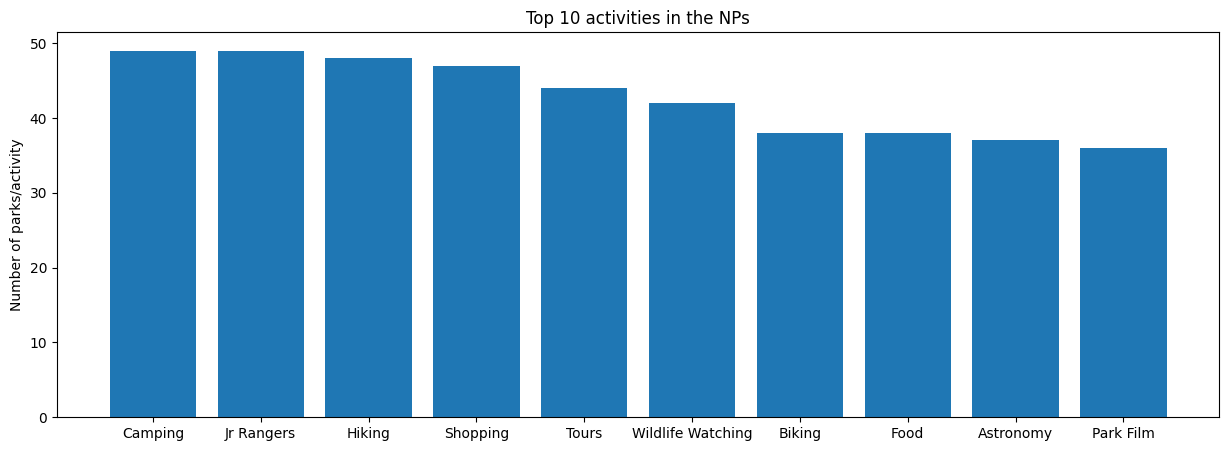

In [55]:
#make a barplot with the top10 activities
plt.figure(figsize=(15,5))
plt.bar(df.head(10)['activity'], df.head(10)['count'])
plt.title('Top 10 activities in the NPs')
plt.ylabel('Number of parks/activity')

In [57]:
activities = pd.read_csv('activities_parks.csv')

In [58]:
activities = activities.drop(columns=['Unnamed: 0'])

In [59]:
activities.rename(columns={'0':'activity'}, inplace=True)

In [60]:
activities

,activity,park_code_act
0,Arts and Culture,acad
1,Arts and Culture,arch
2,Arts and Culture,care
3,Arts and Culture,cuva
4,Arts and Culture,glac
...,...,...
764,Wildlife Watching,voya
765,Wildlife Watching,wica
766,Wildlife Watching,yell
767,Wildlife Watching,yose
